You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd

df= pd.read_csv('diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#checking value counts
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='value counts'>

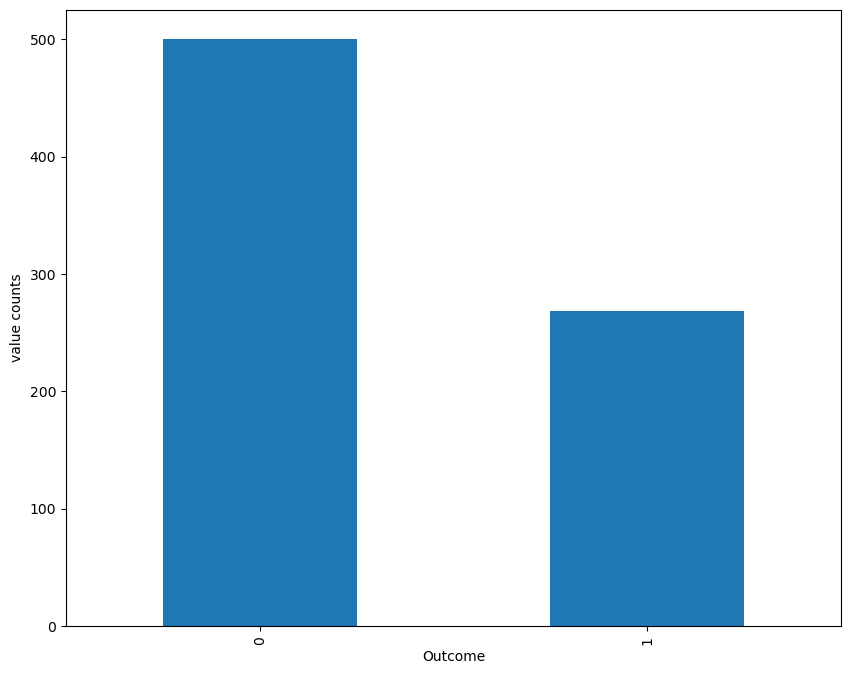

In [5]:
df['Outcome'].value_counts().plot(kind='bar', xlabel='Outcome', ylabel='value counts', figsize=(10,8))

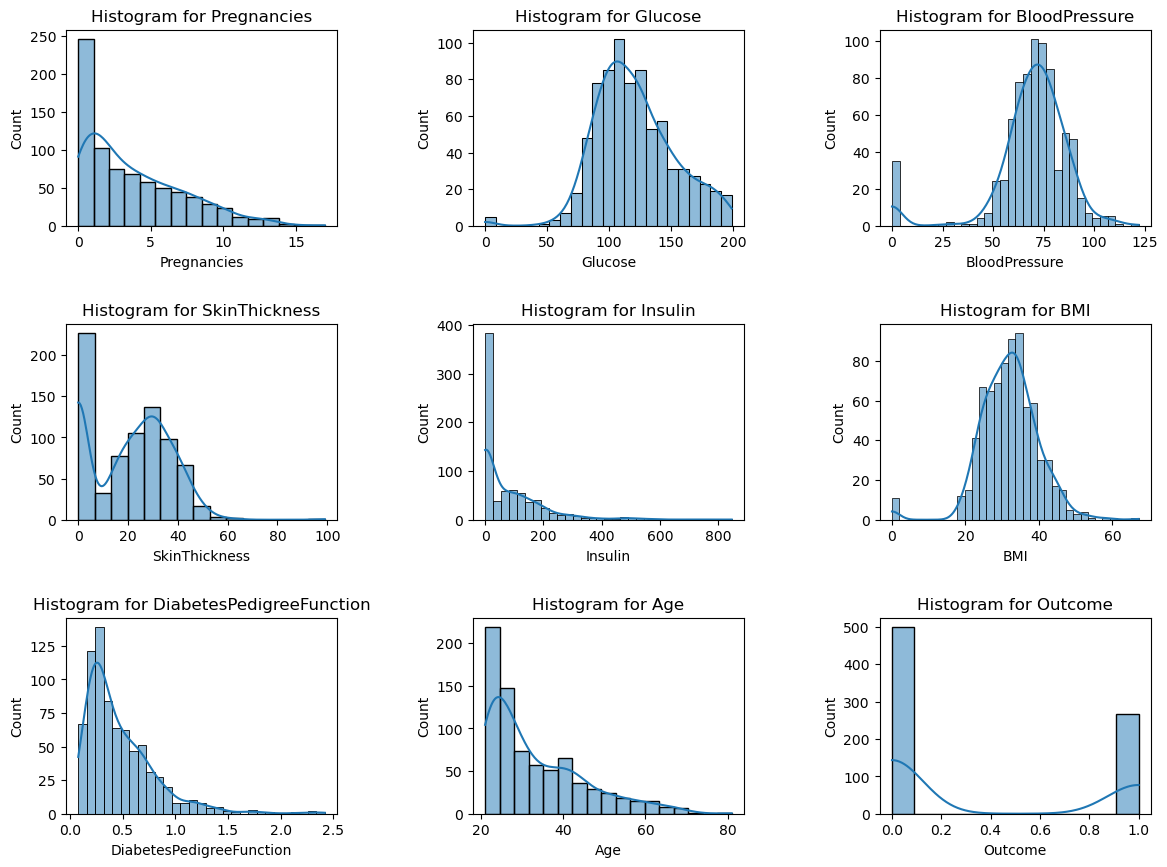

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

x=1
plt.figure(figsize=(14,8))
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df.columns:
    plt.subplot(3,3,x)
    x=x+1
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
plt.show()

#insights


- Glucose feature has 0 values which does not make sense, need to replace 0 values with median.
- Skin Thickness feature also has 0 values which also does not make sense, need to replace 0 values with median.
- Insulin feature also has 0 values which does not make sense, replace this 0 values with median.
- BMI feature also has 0 values which does not make sense, replace this 0 values with median.
- Blood Pressure feature has 0 values which does not make sense, replace this 0 values with median.

In [7]:
df.groupby('Outcome').describe().T

Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]

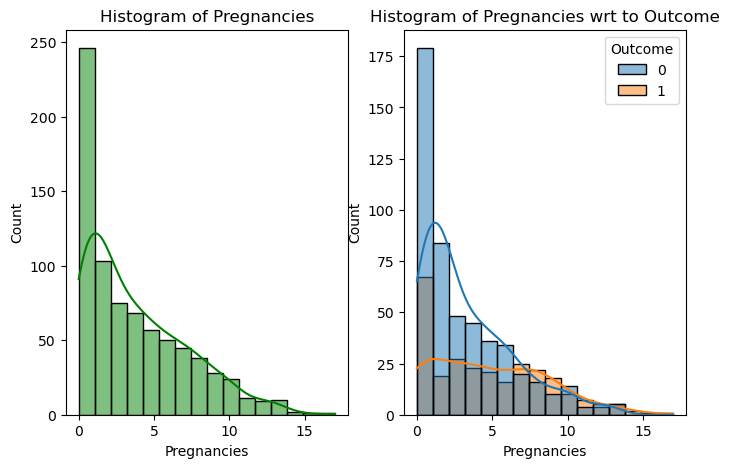

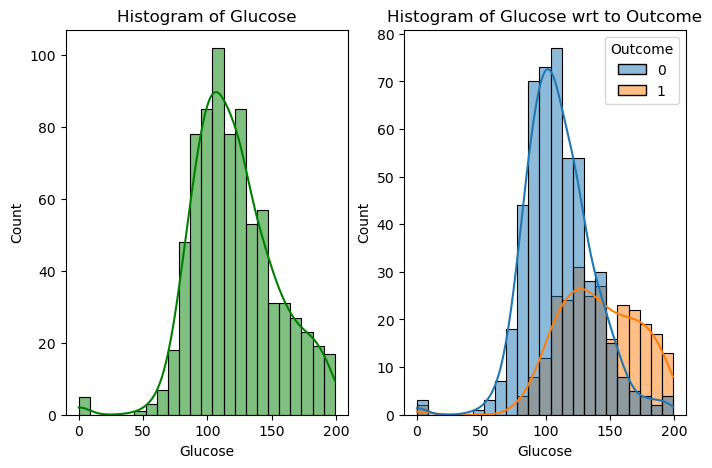

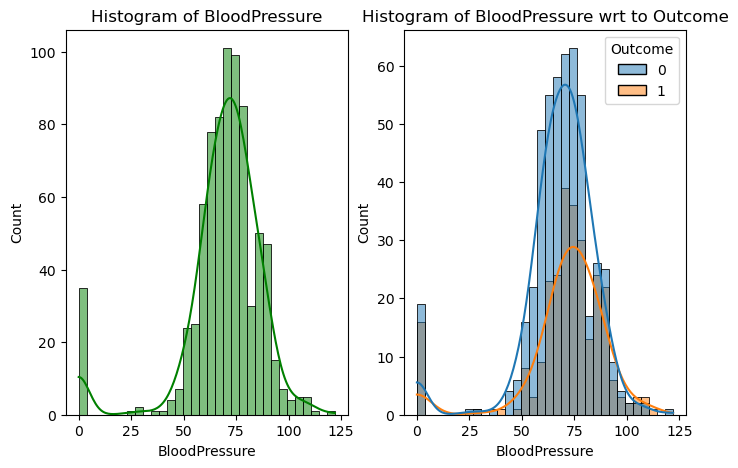

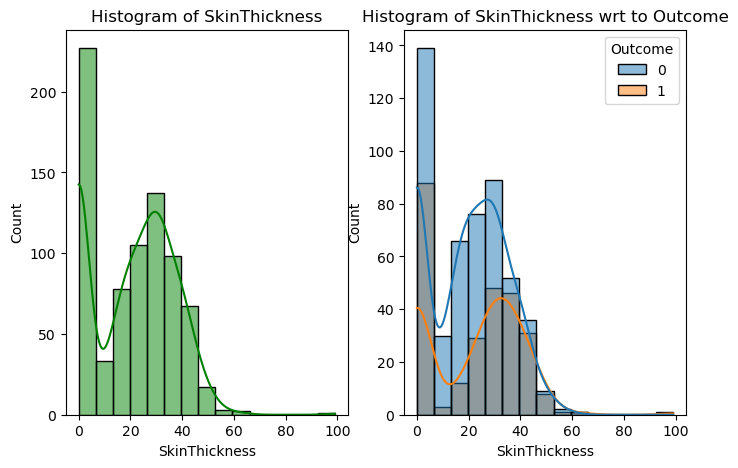

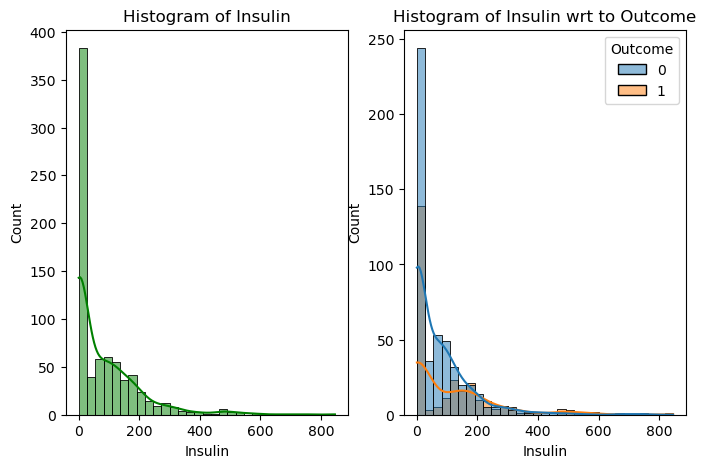

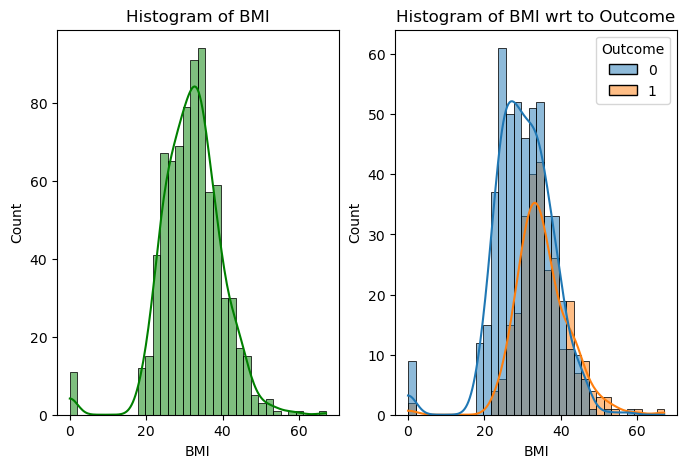

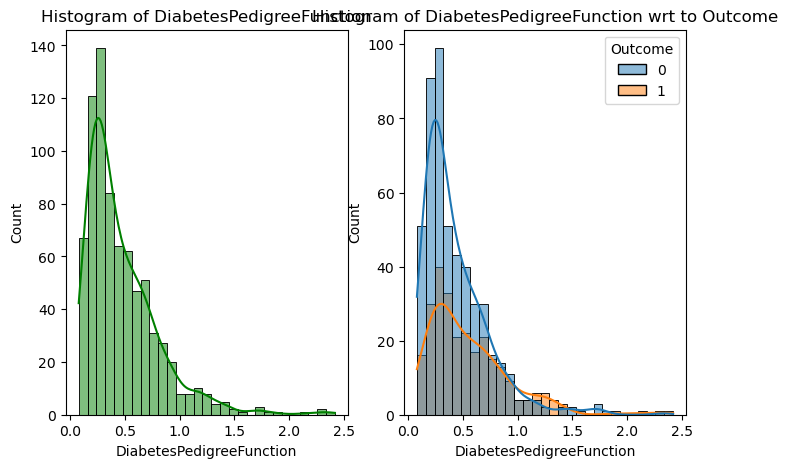

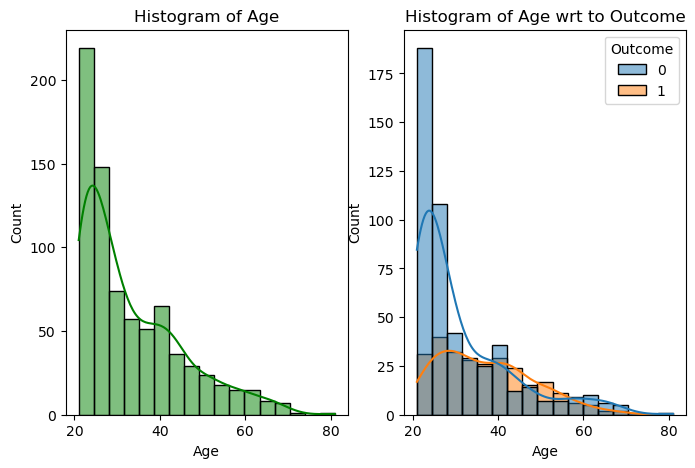

In [8]:
for i in df.columns:
    if i != 'Outcome':
        fig,ax = plt.subplots(1,2,figsize=(8,5))
        plt.subplot(121)
        sns.histplot(data=df, x= i, kde=True, bins='fd', color='green')
        plt.title(f'Histogram of {i}')
        plt.subplot(122)
        sns.histplot(data=df, x= i, kde=True, bins='fd', hue='Outcome')
        plt.title(f'Histogram of {i} wrt to Outcome')
        plt.show()

In [9]:
df_corr=df.corr()

In [10]:
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


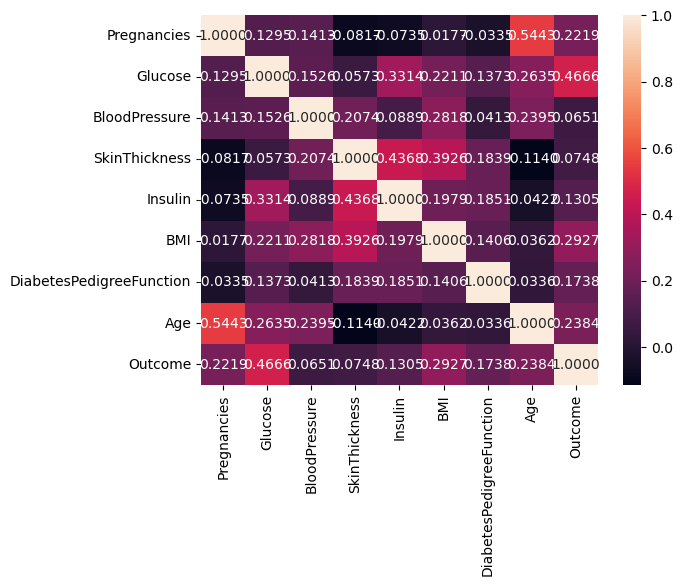

In [11]:
sns.heatmap(df_corr, annot=True, fmt='.4f')
plt.show()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [12]:
cols_with_zero=['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']

In [13]:
print('Number of zeroes in the data')
for i in cols_with_zero:
    print(f'{i}: {len(df[df[i]==0])}')
    

Number of zeroes in the data
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [14]:
for i in cols_with_zero:
    df[i]=df[i].replace(0,df[i].median())

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
import numpy as np

def IQR_fn(df):
    IQR=[]
    upper=[]
    lower=[]
    maxi=[]
    mini=[]
    for i in df.columns:
        q1=np.percentile(df[i],25)
        q3=np.percentile(df[i],75)
        IQR.append(q3-q1)
        upper.append(q3+1.5*(q3-q1))
        lower.append(q1-1.5*(q3-q1))
        maxi.append(df[i].max())
        mini.append(df[i].min())
    df_iqr=pd.DataFrame([IQR,lower,upper,mini,maxi]).T
    df_iqr.index=df.columns
    df_iqr.columns=['IQR','lower','upper','mini','maxi']
    return df_iqr

In [17]:
#separating the data based on independent and dependent varaibles
X=df.drop(labels=['Outcome'], axis=1)
y=df[['Outcome']]

In [18]:
X_iqr=IQR_fn(X)
X_iqr

,IQR,lower,upper,mini,maxi
Pregnancies,5.0000,-6.500,13.500,0.000,17.00
Glucose,40.5000,39.000,201.000,44.000,199.00
BloodPressure,16.0000,40.000,104.000,24.000,122.00
SkinThickness,9.0000,9.500,45.500,7.000,99.00
Insulin,96.7500,-114.625,272.375,14.000,846.00
BMI,9.1000,13.850,50.250,18.200,67.10
DiabetesPedigreeFunction,0.3825,-0.330,1.200,0.078,2.42
Age,17.0000,-1.500,66.500,21.000,81.00


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [20]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [22]:
X_train.shape

(576, 8)

In [23]:
X_test.shape

(192, 8)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [24]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':list(range(1,13)),
    'max_features':['sqrt','log2']
}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
gs=GridSearchCV(dtc, param_grid=parameters, cv=5, scoring='roc_auc')
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [26]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [27]:
gs.best_score_

0.7902810728744939

In [28]:
dtc_best = gs.best_estimator_

In [29]:
dtc_best.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       splitter='random')

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [30]:
y_pred=dtc_best.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       123
           1       0.59      0.33      0.43        69

    accuracy                           0.68       192
   macro avg       0.64      0.60      0.60       192
weighted avg       0.66      0.68      0.65       192



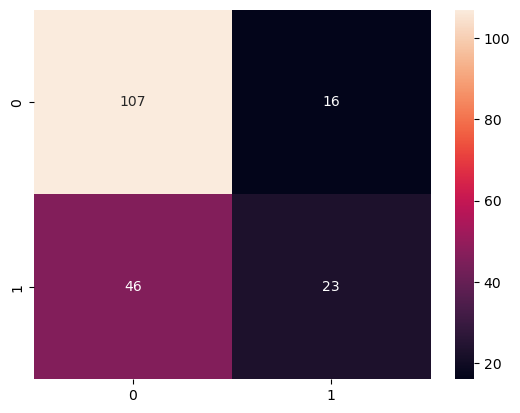

In [33]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf, annot=True, fmt='d')
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print('Accuracy score is:',acc)

Accuracy score is: 0.6770833333333334


In [35]:
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc_best.predict_proba(X_test)[:,-1]
auc=roc_auc_score(y_test,y_pred_prob)
print('ROC-AUC Score for the model is',auc)

ROC-AUC Score for the model is 0.6861081654294804


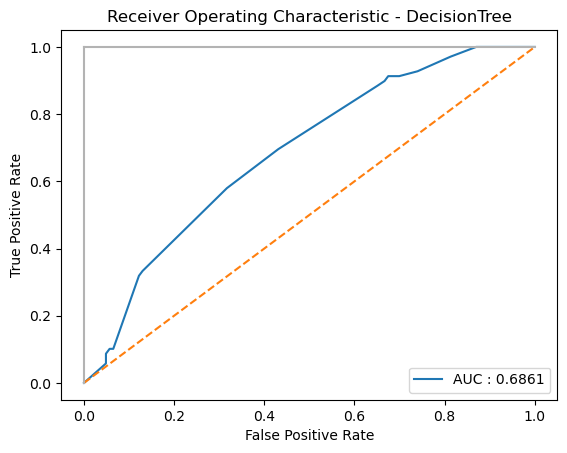

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y_test,y_pred_prob)
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr, label=f'AUC : {auc:.4f}')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

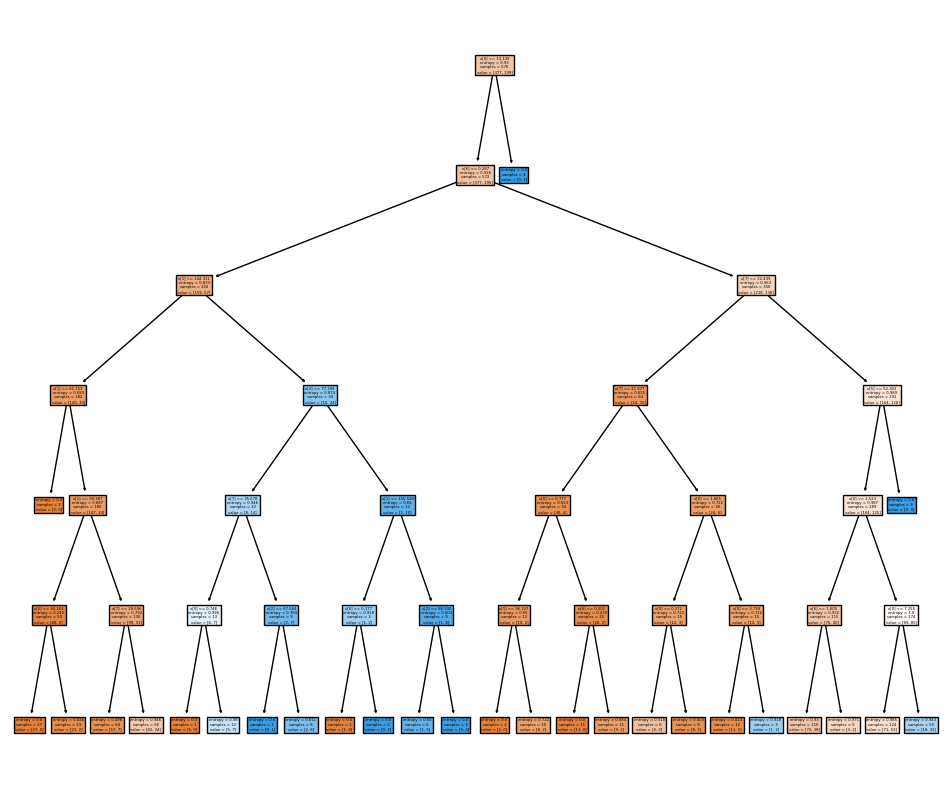

In [37]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtc_best,filled=True)
plt.show()

In [39]:
imp=dtc_best.feature_importances_
imp=pd.Series(imp)
imp.index=X_train.columns
imp=imp.sort_values(ascending=False)
imp

Glucose                     0.358881
Age                         0.242930
Pregnancies                 0.202028
DiabetesPedigreeFunction    0.116214
BMI                         0.058785
BloodPressure               0.021162
SkinThickness               0.000000
Insulin                     0.000000
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances'}, ylabel='Importance'>

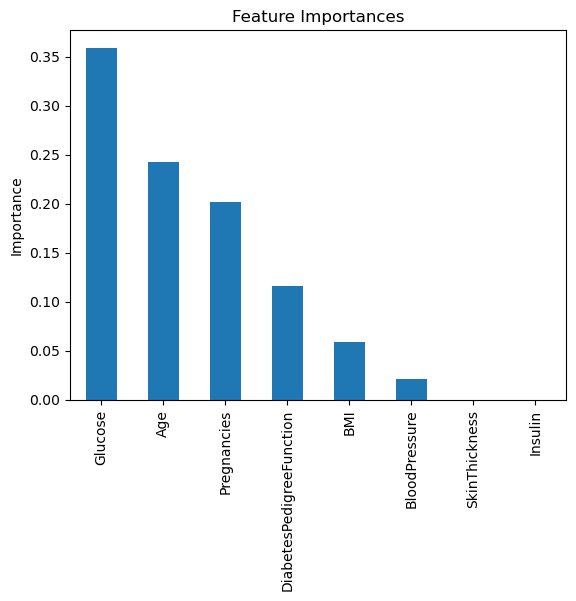

In [42]:
imp.plot(kind='bar',ylabel='Importance',title='Feature Importances')

## Top four most important features for predicting diabetes are
1. Glucose
2. Age
3. Pregnancies
4. Diabetes Pedigree function

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [49]:
patient_data={
'Pregnancies':[3],
'Glucose':[180],
'BloodPressure':[90],
'SkinThickness':[30],
'Insulin':[450],
'BMI':[20],
'DiabetesPedigreeFunction':[0.10],
'Age':[29]
}

In [50]:
df_new=pd.DataFrame(patient_data)
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,180,90,30,450,20,0.1,29


In [51]:
new_pred=dtc_best.predict(df_new)[0]
new_pred

1

In [54]:
if new_pred==1:
    print('Patient is Diabetic')
    print(f'Probbaibility of diabetic : {dtc_best.predict_proba(df_new)[0][1]}')
else:
    print('Patient is non Diabetic')
    print(f'Probaibility of diabetic : {dtc_best.predict_proba(df_new)[0][1]}')

Patient is Diabetic
Probbaibility of diabetic : 1.0
